### IMPORTING LIBRARIES FOR EDA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


### IMPORTING THE DATASET AND CHECKING FOR NULL VALUES AND DUPLICATES

In [3]:
df_lead_data = pd.read_csv("C:\\Users\\vikra\\Documents\\Analytics Vidhya\\Python\\Lead Scoring\\data - data.csv")
df_lead_data = df_lead_data.drop_duplicates()
df_lead_data['created_at'] = pd.to_datetime(df_lead_data['created_at'])
df_lead_data


,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,...,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 07:26:00,hotmail,com,combined,form_1,Fresher,source_1,medium_1,False,-1,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 11:51:00,gmail,com,91,form_4,Fresher,source_2,medium_3,False,-1,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 15:23:00,gmail,com,91,form_5,Fresher,source_1,medium_1,False,-1,...,1,0,0,0,0,0,0,0,0,0
3,2021-01-01 17:13:00,gmail,com,86,form_6,Fresher,source_3,medium_4,False,-1,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 18:31:00,gmail,com,880,form_1,Fresher,source_1,medium_1,False,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60290,2022-09-19 14:06:00,gmail,com,91,form_11,12+ years,source_4,medium_5,True,2760,...,0,0,0,0,1,0,0,0,0,0
60291,2021-08-05 10:01:00,gmail,com,91,form_11,12+ years,source_4,medium_5,True,2786,...,0,0,0,0,1,0,0,0,0,0
60292,2022-08-24 18:28:00,gmail,com,91,form_6,8-12 years,source_4,medium_5,True,2790,...,0,0,0,0,0,0,0,0,0,0
60293,2022-09-24 22:37:00,gmail,com,91,form_7,8-12 years,source_11,medium_13,True,2805,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(df_lead_data.isnull().sum())

created_at          0
subdomain           0
ext                 0
country_code        0
form_type           0
experience          0
utm_source          0
utm_medium          0
is_signedup         0
vintage             0
weekday             0
quarter             0
is_weekend          0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
#leads              0
lead_rate           0
form_1              0
form_6              0
form_7              0
form_2              0
form_3              0
form_4              0
form_5              0
form_8              0
form_9              0
form_10             0
form_11             0
form_12             0
form_13             0
form_14             0
form_15             0
buy                 0
dtype: int64


### DATATYPES

In [5]:
df_lead_data.dtypes

created_at          datetime64[ns]
subdomain                   object
ext                         object
country_code                object
form_type                   object
experience                  object
utm_source                  object
utm_medium                  object
is_signedup                   bool
vintage                      int64
weekday                      int64
quarter                      int64
is_weekend                   int64
is_month_start                bool
is_month_end                  bool
is_quarter_start              bool
is_quarter_end                bool
#leads                       int64
lead_rate                  float64
form_1                       int64
form_6                       int64
form_7                       int64
form_2                       int64
form_3                       int64
form_4                       int64
form_5                       int64
form_8                       int64
form_9                       int64
form_10             

### VALUE COUNTS

### OVERALL BUY PERCENTAGE

In [6]:
print(df_lead_data['buy'].value_counts(normalize=True).mul(100))
buy_pct = round(df_lead_data[df_lead_data['buy'] == 1].shape[0] / df_lead_data.shape[0] * 100, 2)

0    98.359595
1     1.640405
Name: buy, dtype: float64


In [7]:
print(df_lead_data['subdomain'].value_counts(normalize=True).mul(100))

gmail         82.320451
combined       8.756013
yahoo          4.456792
hotmail        1.861005
outlook        1.008459
rediffmail     0.281970
fractal        0.273677
live           0.238846
icloud         0.195721
mail           0.172500
gamil          0.162548
qq             0.150937
aol            0.121081
Name: subdomain, dtype: float64


### 'gamil' is just gmail misspelled, so a correction is needed

In [8]:
df_lead_data.replace('gamil', 'gmail', inplace=True)

In [9]:
print(df_lead_data['subdomain'].value_counts(normalize=True).mul(100))

gmail         82.482999
combined       8.756013
yahoo          4.456792
hotmail        1.861005
outlook        1.008459
rediffmail     0.281970
fractal        0.273677
live           0.238846
icloud         0.195721
mail           0.172500
qq             0.150937
aol            0.121081
Name: subdomain, dtype: float64


In [10]:
print(df_lead_data['ext'].value_counts(normalize=True).mul(100))

com         93.259247
combined     3.342179
ac.in        0.830984
edu          0.517499
co.in        0.320119
in           0.295240
ai           0.293581
edu.in       0.291922
net          0.262067
fr           0.223918
org          0.200697
co.uk        0.162548
Name: ext, dtype: float64


In [11]:
print(df_lead_data['country_code'].value_counts(normalize=True).mul(100))

91          52.854536
1           10.228894
234          5.430420
combined     3.944269
92           2.534417
254          1.728313
44           1.663626
55           1.403218
251          1.112954
880          1.101344
27           1.034998
233          0.975286
20           0.952065
62           0.945430
98           0.918892
61           0.626970
971          0.613700
49           0.593797
90           0.577210
977          0.565600
33           0.542379
84           0.515840
212          0.505888
94           0.441201
52           0.431249
966          0.414662
263          0.399735
57           0.369879
60           0.361586
86           0.353292
216          0.341682
7            0.338365
65           0.338365
213          0.328413
256          0.295240
255          0.283629
34           0.268701
63           0.263725
39           0.235528
54           0.230552
66           0.225576
82           0.218942
237          0.207331
51           0.205673
225          0.192403
353       

In [12]:
print(df_lead_data['experience'].value_counts(normalize=True).mul(100))

Fresher       37.158733
0-3 years     33.181290
3-8 years     12.133024
12+ years     11.280478
8-12 years     6.246475
Name: experience, dtype: float64


In [13]:
print(df_lead_data['utm_source'].value_counts(normalize=True).mul(100))

source_6     36.080610
source_4     33.586001
source_5     11.116271
source_1      6.040803
source_7      3.468237
source_11     3.335545
source_9      1.724996
source_3      1.673578
source_12     1.572400
source_8      0.940454
source_10     0.265384
source_2      0.195721
Name: utm_source, dtype: float64


In [14]:
print(df_lead_data['utm_medium'].value_counts(normalize=True).mul(100))

medium_6     36.345994
medium_5     33.586001
medium_7     11.549179
medium_8      5.337535
medium_10     4.528114
medium_14     4.115110
medium_1      1.570741
medium_13     0.792835
medium_2      0.791176
medium_9      0.563941
medium_4      0.416321
medium_12     0.225576
medium_11     0.140985
medium_3      0.036490
Name: utm_medium, dtype: float64


In [15]:
print(df_lead_data['is_signedup'].value_counts(normalize=True).mul(100))

True     60.827666
False    39.172334
Name: is_signedup, dtype: float64


### EDA

In [16]:
print("Ratio of people who have filled each type of form and bought to total people who have filled each type of form")
percentages = []
forms =  []
for x in range(1,16):
    i = round(df_lead_data[(df_lead_data['form_{num}'.format(num=x)] > 0) & (df_lead_data['buy'] == 1)].shape[0] / df_lead_data[df_lead_data['form_{num}'.format(num=x)] > 0].shape[0] * 100, 2)
    percentages.append(i)
    forms.append("Form {num}".format(num=x))
    print("Form " + str(x) + ": {num}%".format(num=i))




Ratio of people who have filled each type of form and bought to total people who have filled each type of form
Form 1: 2.41%
Form 2: 15.19%
Form 3: 1.87%
Form 4: 8.51%
Form 5: 3.6%
Form 6: 1.31%
Form 7: 1.2%
Form 8: 5.34%
Form 9: 5.6%
Form 10: 19.84%
Form 11: 5.05%
Form 12: 3.49%
Form 13: 2.7%
Form 14: 3.45%
Form 15: 0.96%


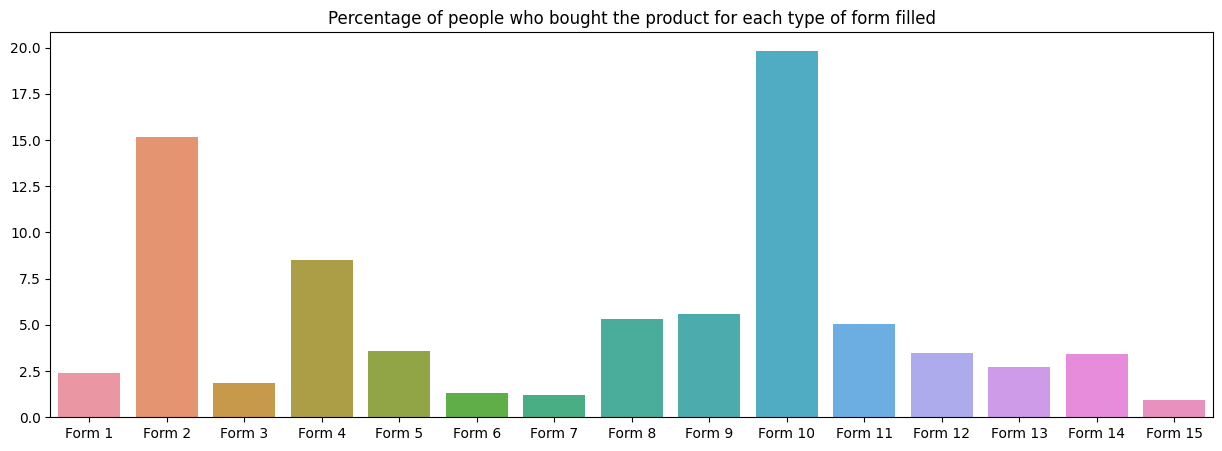

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=forms, y=percentages, ax=ax).set(title='Percentage of people who bought the product for each type of form filled')
plt.show()

In [18]:
fig_forms = px.bar(x=forms, y=percentages)
fig_forms.update_layout(xaxis={'categoryorder': 'total ascending'})
fig_forms.add_hline(y=buy_pct)
fig_forms.show()

In [19]:
df_forms = df_lead_data.groupby(df_lead_data['form_type'])['buy'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
fig_form_type = px.bar(df_forms[df_forms['buy'] == 1], x='form_type', y='percentage', color='buy')
fig_form_type.update(layout_coloraxis_showscale=False)
fig_form_type.update_layout(xaxis={'categoryorder': 'total ascending'})
fig_form_type.add_hline(y=buy_pct)
fig_form_type.show()

In [20]:
print("Percentage of users who buy based on different times")
print("Overall Percentage:", buy_pct)
print()

month_start_buy_pct = round(df_lead_data[(df_lead_data['is_month_start'] == True) & (df_lead_data['buy'] == 1)].shape[0] / df_lead_data[(df_lead_data['is_month_start'] == True)].shape[0] * 100, 2)
not_month_start_buy_pct = round(df_lead_data[(df_lead_data['is_month_start'] == False) & (df_lead_data['buy'] == 1)].shape[0] / df_lead_data[df_lead_data['is_month_start'] == False].shape[0] * 100, 2)
print("Month start:") 
print("Yes:", month_start_buy_pct, "No:", not_month_start_buy_pct)
print()

month_end_buy_pct = round(df_lead_data[(df_lead_data['is_month_end'] == True) & (df_lead_data['buy'] == 1)].shape[0] / df_lead_data[(df_lead_data['is_month_end'] == True)].shape[0] * 100, 2)
not_month_end_buy_pct = round(df_lead_data[(df_lead_data['is_month_end'] == False) & (df_lead_data['buy'] == 1)].shape[0] / df_lead_data[df_lead_data['is_month_end'] == False].shape[0] * 100, 2)
print("Month end:")
print("Yes:", month_end_buy_pct, "No:", not_month_end_buy_pct)
print()

quarter_start_buy_pct = round(df_lead_data[(df_lead_data['is_quarter_start'] == True) & (df_lead_data['buy'] == 1)].shape[0] / df_lead_data[(df_lead_data['is_quarter_start'] == True)].shape[0] * 100, 2)
not_quarter_start_buy_pct = round(df_lead_data[(df_lead_data['is_quarter_start'] == False) & (df_lead_data['buy'] == 1)].shape[0] / df_lead_data[df_lead_data['is_quarter_start'] == False].shape[0] * 100, 2)
print("Quarter start:")
print("Yes:", quarter_start_buy_pct, "No:", not_quarter_start_buy_pct)
print()

quarter_end_buy_pct = round(df_lead_data[(df_lead_data['is_quarter_end'] == True) & (df_lead_data['buy'] == 1)].shape[0] / df_lead_data[(df_lead_data['is_quarter_end'] == True)].shape[0] * 100, 2)
not_quarter_end_buy_pct = round(df_lead_data[(df_lead_data['is_quarter_end'] == False) & (df_lead_data['buy'] == 1)].shape[0] / df_lead_data[df_lead_data['is_quarter_end'] == False].shape[0] * 100, 2)
print("Quarter end:")
print("Yes:", quarter_end_buy_pct, "No:", not_quarter_end_buy_pct)
print()

weekend_buy_pct = round(df_lead_data[(df_lead_data['is_weekend'] == 1) & (df_lead_data['buy'] == 1)].shape[0] / df_lead_data[(df_lead_data['is_weekend'] == 1)].shape[0] * 100, 2)
not_weekend_buy_pct = round(df_lead_data[(df_lead_data['is_weekend'] == 0) & (df_lead_data['buy'] == 1)].shape[0] / df_lead_data[df_lead_data['is_weekend'] == 0].shape[0] * 100, 2)
print("Weekend:")
print("Yes:", quarter_end_buy_pct, "No:", not_quarter_end_buy_pct)
print()

Percentage of users who buy based on different times
Overall Percentage: 1.64

Month start:
Yes: 1.75 No: 1.64

Month end:
Yes: 2.49 No: 1.61

Quarter start:
Yes: 2.31 No: 1.63

Quarter end:
Yes: 2.76 No: 1.63

Weekend:
Yes: 2.76 No: 1.63



In [21]:
df_quarter = df_lead_data.groupby(df_lead_data['quarter'])['buy'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
fig_q = px.bar(df_quarter[df_quarter['buy'] == 1], x='quarter', y='percentage', color='buy')
fig_q.update(layout_coloraxis_showscale=False)
fig_q.show()

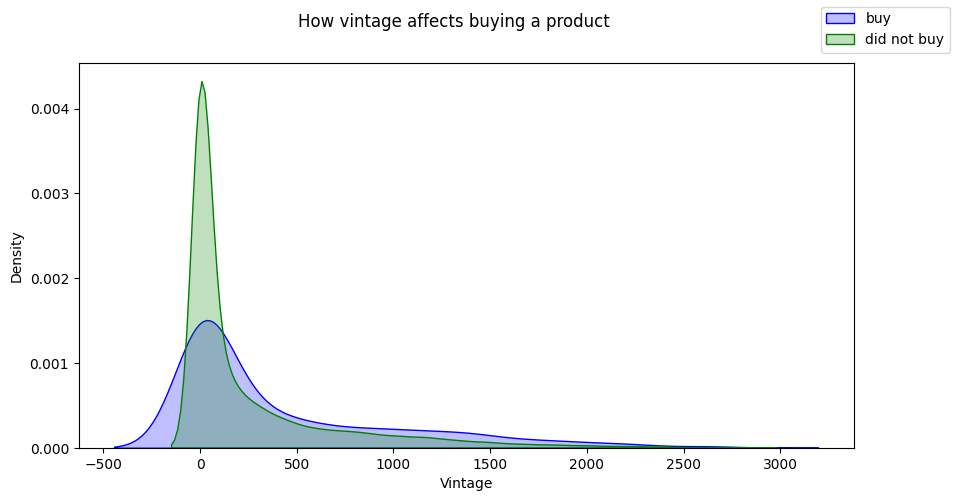

In [22]:
fig_kde, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data=df_lead_data[df_lead_data['buy'] == 1]['vintage'], fill=True, color="blue", label="bought", ax=ax)
sns.kdeplot(data=df_lead_data[df_lead_data['buy'] == 0]['vintage'], fill=True, color="green", label="did not buy", ax=ax)

ax.set_xlabel("Vintage")
ax.set_ylabel("Density")

fig_kde.legend(labels=['buy', 'did not buy'])
fig_kde.suptitle("How vintage affects buying a product")
plt.show()

In [23]:
bins_v = [-1, 0, 500, 1000, 1500, 2000, 2500, 3000]
df_lead_data['vintage_bins'] = pd.cut(df_lead_data['vintage'], bins_v, right=False, include_lowest=True)


df_vintage_groups = df_lead_data.groupby(df_lead_data['vintage_bins'])['buy'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
df_vintage_groups['vintage_bins'] = df_vintage_groups['vintage_bins'].astype('str')
fig_vintage = px.line(df_vintage_groups, x='vintage_bins', y='percentage', color='buy', 
              title='Percentage of users buying based on a range of their vintage',
              labels={'vintage_bins': 'vintage range', 'percentage': 'buy %'})
fig_vintage.add_hline(y=buy_pct)
fig_vintage.show()

In [24]:
print(df_lead_data['vintage_bins'].value_counts())

[0, 500)        25370
[-1, 0)         23617
[500, 1000)      6069
[1000, 1500)     3282
[1500, 2000)     1303
[2000, 2500)      565
[2500, 3000)       84
Name: vintage_bins, dtype: int64


In [25]:
df_lead_data['month_num'] = df_lead_data.created_at.dt.month

df_month = df_lead_data.groupby(df_lead_data['month_num'])['buy'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
fig_m = px.bar(df_month[df_month['buy'] == 1], x='month_num', y='percentage', color='buy')
fig_m.update(layout_coloraxis_showscale=False)
fig_m.add_hline(y=buy_pct)
fig_m.show()


In [26]:
df_experience = df_lead_data.groupby(df_lead_data['experience'])['buy'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
fig_e = px.bar(df_experience[df_experience['buy'] == 1], x='experience', y='percentage', color='buy')
fig_e.update(layout_coloraxis_showscale=False)
fig_e.update_layout(xaxis={'categoryorder': 'total ascending'})
fig_e.add_hline(y=buy_pct)
fig_e.show()

In [27]:
df_sign = df_lead_data.groupby(df_lead_data['is_signedup'])['buy'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
fig_e = px.bar(df_sign[df_sign['buy'] == 1], x='is_signedup', y='percentage', color='buy')
fig_e.update(layout_coloraxis_showscale=False)
fig_e.show()


In [28]:
df_source = df_lead_data.groupby(df_lead_data['utm_source'])['buy'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
fig_source = px.bar(df_source[df_source['buy'] == 1], x='utm_source', y='percentage', color='buy')
fig_source.update(layout_coloraxis_showscale=False)
fig_source.update_layout(xaxis={'categoryorder': 'total ascending'})
fig_source.add_hline(y=buy_pct)
fig_source.show()

In [29]:
df_medium = df_lead_data.groupby(df_lead_data['utm_medium'])['buy'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
fig_medium = px.bar(df_medium[df_medium['buy'] == 1], x='utm_medium', y='percentage', color='buy')
fig_medium.update(layout_coloraxis_showscale=False)
fig_medium.update_layout(xaxis={'categoryorder': 'total ascending'})
fig_medium.add_hline(y=buy_pct)
fig_medium.show()

In [30]:
df_subdomain = df_lead_data.groupby(df_lead_data['subdomain'])['buy'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
fig_subdomain= px.bar(df_subdomain[df_subdomain['buy'] == 1], x='subdomain', y='percentage', color='buy')
fig_subdomain.update(layout_coloraxis_showscale=False)
fig_subdomain.update_layout(xaxis={'categoryorder': 'total ascending'})
fig_subdomain.add_hline(y=buy_pct)
fig_subdomain.show()

In [31]:
df_country = df_lead_data.groupby(df_lead_data['country_code'])['buy'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
fig_country= px.bar(df_country[(df_country['buy'] == 1)], x='country_code', y='percentage', color='buy')
fig_country.update(layout_coloraxis_showscale=False)
fig_country.update_layout(xaxis={'categoryorder': 'total ascending'})
fig_country.add_hline(y=buy_pct)
fig_country.show()

### EDA CONCLUSION: 
#### There are many columns in this dataset that can be features. Since the overall buy percentage is very low, anything that influences the buy percentage such that it's significantly higher than the average counts as a feature. By that accord, form_(1-15), form_type, is_month_end, is_quarter_end, is_weekend, vintage, experience, utm_source, utm_medium and country_code all count as features.

### IMPORTING LIBRARIES FOR THE ML MODEL

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [33]:
feature_columns = ['form_1', 'form_2', 'form_3', 'form_4', 'form_5', 'form_6', 'form_7', 'form_8', 'form_9', 'form_10', 'form_11', 'form_12',
                    'form_13', 'form_14', 'form_15', 'form_type', 'experience', 'utm_source', 'utm_medium',
                    'is_month_end', 'is_quarter_end', 'is_weekend', 'vintage_bins', 'country_code', 'subdomain']

categorical_columns = ['form_type', 'experience', 'utm_source', 'utm_medium', 'country_code', 'subdomain', 'vintage_bins']

X = df_lead_data[feature_columns].copy()

le = LabelEncoder()
X[categorical_columns] = X[categorical_columns].apply(le.fit_transform)

y = df_lead_data['buy'].copy()

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

log_regr = LogisticRegression(solver='lbfgs', max_iter=1200)
log_regr.fit(X_train, y_train)
predictions = log_regr.predict(X_test)
probabilities = log_regr.predict_proba(X_test)
preds_with_custom_threshold = (log_regr.predict_proba(X_test)[:,1] >= 0.05).astype(int)
score = log_regr.score(X_test, y_test)
print(score)
print(probabilities)

0.9842101771379288
[[0.96463306 0.03536694]
 [0.99446547 0.00553453]
 [0.99366077 0.00633923]
 ...
 [0.99253234 0.00746766]
 [0.99172789 0.00827211]
 [0.99126293 0.00873707]]


In [35]:
basic_pred_matrix = metrics.confusion_matrix(y_test, predictions)
threshold_pred_matrix = metrics.confusion_matrix(y_test, preds_with_custom_threshold)

Text(0.5, 1.0, 'Accuracy: 98.42%')

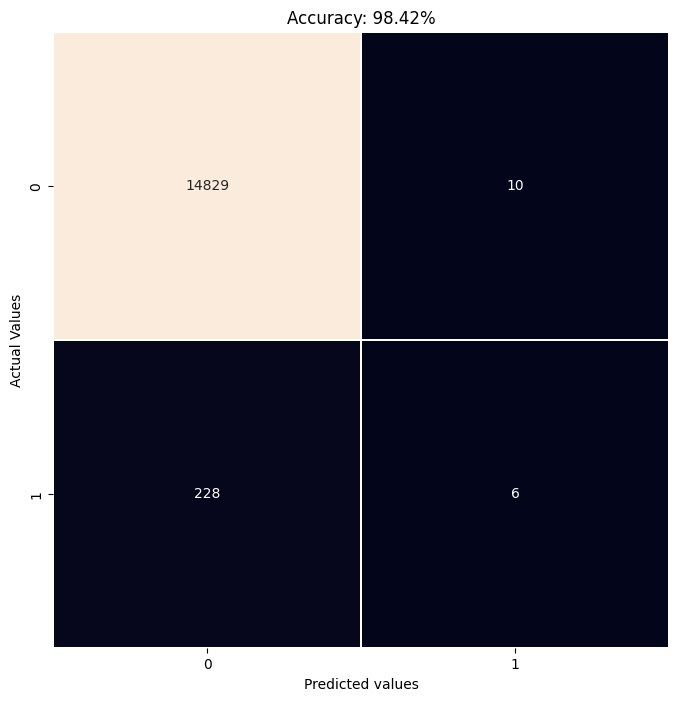

In [36]:
plt.figure(figsize=(8,8))
sns.heatmap(basic_pred_matrix, annot=True, fmt='.0f', linewidth=0.3, square=True, cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
matrix_title = 'Accuracy: {num}%'.format(num=round(score,4) * (100))
plt.title(matrix_title)


Text(0.5, 1.0, 'Accuracy: 98.42%')

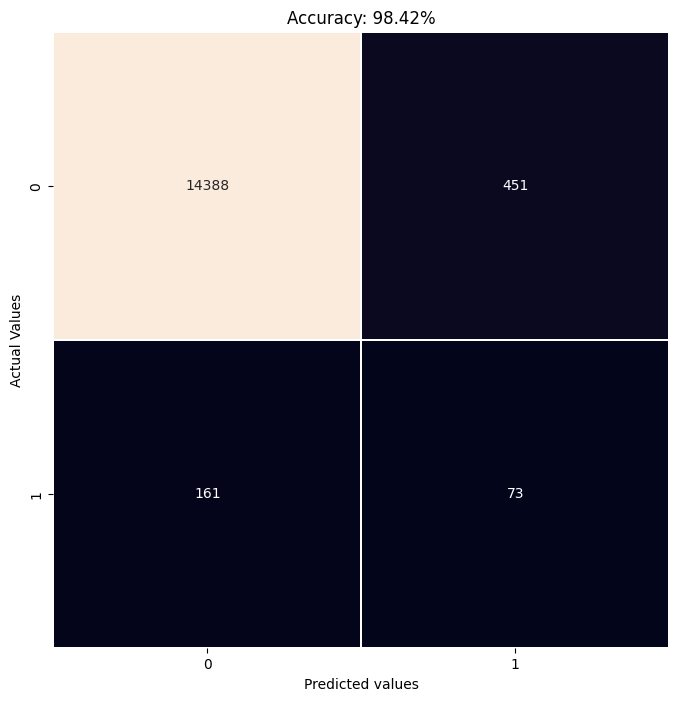

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(threshold_pred_matrix, annot=True, fmt='.0f', linewidth=0.3, square=True, cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
matrix_title = 'Accuracy: {num}%'.format(num=round(score,4) * (100))
plt.title(matrix_title)

In [38]:
false_pos, true_pos, _ = metrics.roc_curve(y_test, predictions, pos_label=1)


equal_pr = [0 for i in range(len(y_test))]
equalFPR, equalTPR, _ = metrics.roc_curve(y_test, equal_pr, pos_label=1)

auc_score1 = metrics.roc_auc_score(y_test, predictions)

print(auc_score1)

0.5124835628912723


In [39]:
fpr_prob, tpr_prob, threshold = metrics.roc_curve(y_test, probabilities[:,1], pos_label=1)
auc_score_prob = metrics.roc_auc_score(y_test, probabilities[:,1])

print(auc_score_prob)

0.765542463466852


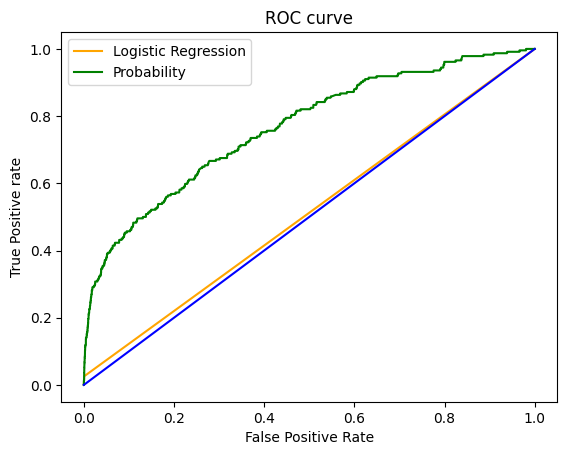

In [40]:
plt.plot(false_pos, true_pos,color='orange', label='Logistic Regression')
plt.plot(fpr_prob, tpr_prob, color='green', label='Probability')
plt.plot(equalFPR, equalTPR, color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()